In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly as py
import plotly.express as px
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("default")

In [3]:
walmart_data = pd.read_csv('Walmart.csv')
walmart_data.sample(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
5674,40,16-12-2011,1198670.19,0,29.53,3.445,136.533516,4.420
6106,43,06-01-2012,670993.01,0,47.59,3.157,211.242813,9.653
2793,20,22-07-2011,1950904.84,0,78.89,3.811,208.593702,7.274
5022,36,04-06-2010,471088.88,0,79.93,2.664,209.939809,8.464
5133,36,20-07-2012,303289.55,0,81.76,3.301,220.614875,6.623
3822,27,03-02-2012,1564246.02,0,42.52,3.796,141.016192,8.009
4486,32,11-02-2011,1124357.20,1,18.51,3.037,191.857288,8.818
5248,37,06-01-2012,558343.57,0,57.18,3.157,218.406288,7.244
27,1,13-08-2010,1508237.76,0,87.00,2.692,211.639421,7.787
5531,39,16-12-2011,1991824.05,0,58.58,3.159,217.878134,7.716


# Examine the Data Structure

In [70]:
warnings.filterwarnings("ignore", category=FutureWarning)
walmart_data.describe(include='all')

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Unemployment_treated,Year,Month,Day
count,6434.000000,6434,6.434000e+03,6434.000000,6434.000000,6434.000000,6434.000000,6434.000000,6434.000000,6434.000000,6434,6434.000000
unique,NaN,143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,NaN
top,NaN,2010-05-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,April,NaN
freq,NaN,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,629,NaN
first,NaN,2010-01-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,23.002487,NaN,1.047041e+06,0.069941,60.673531,3.358661,171.575257,7.999024,7.871061,2010.965030,NaN,15.652471
std,12.987660,NaN,5.643776e+05,0.255067,18.429779,0.459035,39.358967,1.876003,1.520766,0.797081,NaN,8.752934
min,1.000000,NaN,2.099862e+05,0.000000,5.540000,2.472000,126.064000,3.879000,4.294500,2010.000000,NaN,1.000000
25%,12.000000,NaN,5.531677e+05,0.000000,47.495000,2.933000,131.735000,6.891000,6.891000,2010.000000,NaN,8.000000


In [4]:
walmart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [71]:
warnings.filterwarnings("ignore", category=UserWarning)
walmart_data['Date'] = walmart_data['Date'].astype('datetime64')

In [6]:
walmart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [7]:
walmart_data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [8]:
## Checking size of Dataset

In [9]:
walmart_data.shape

(6435, 8)

## Checking for null values

In [10]:
walmart_data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

# Clean and Preprocess the Data

### Checking for outliers

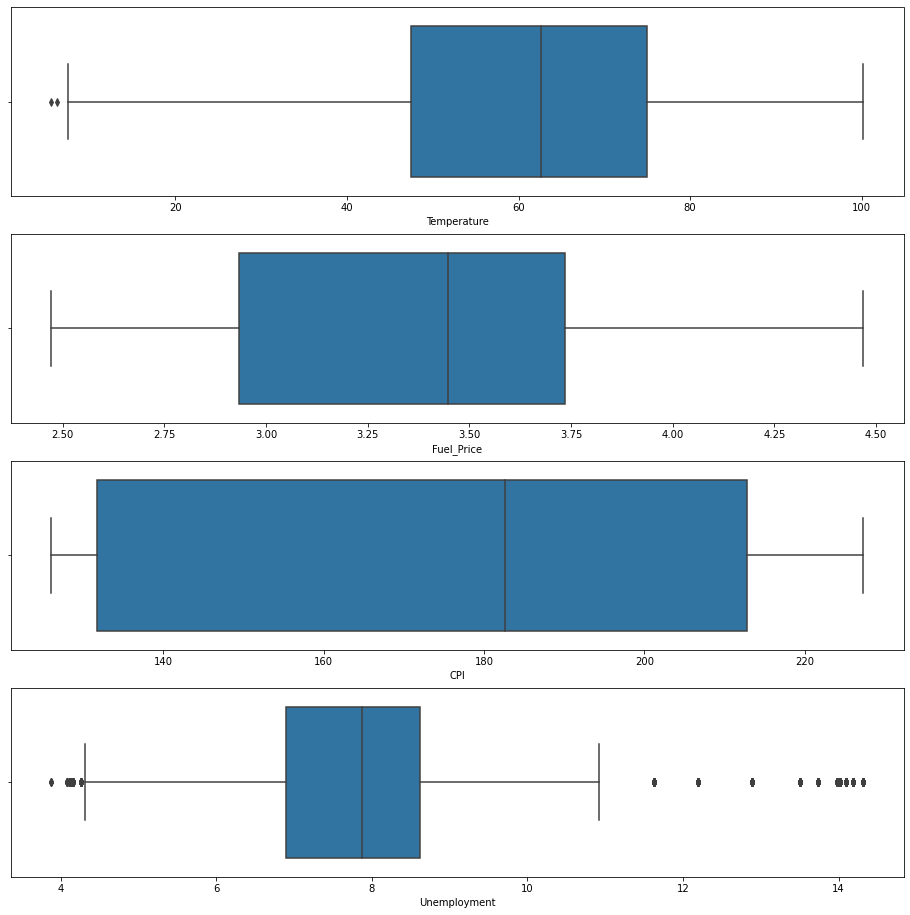

In [73]:
fig,axis = plt.subplots(4,figsize=(16,16))
x=walmart_data[['Temperature','Fuel_Price','CPI','Unemployment']]
for i, column in enumerate(x):
    sns.boxplot(walmart_data[column],ax=axis[i])
warnings.filterwarnings("ignore", category=FutureWarning)

In [75]:
walmart_data[(walmart_data['Unemployment']<4.5) | (walmart_data['Unemployment']>11)].shape

(520, 12)

In [76]:
# Using IQR Method
def thr_min_max(col):
    p25= walmart_data[col].quantile(0.25)
    p75=walmart_data[col].quantile(0.75)
    IQR=p75-p25
    
    thr_min,thr_max = p25 - 1.5* IQR , p75+1.5*IQR
    return thr_min,thr_max


def treating(val):
    if(val<thr_min):
        return thr_min
    elif(val>thr_max):
        return thr_max
    else:
        return val

In [77]:
thr_min,thr_max = thr_min_max('Unemployment')
print(thr_min,thr_max)
walmart_data['Unemployment_treated'] = walmart_data['Unemployment'].apply(treating)

4.2945 11.218499999999999


In [78]:
walmart_data.sample(7)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Unemployment_treated,Year,Month,Day
5360,38,2011-03-06,396826.06,0,71.81,4.031,129.049032,13.736,11.2185,2011,March,6
2260,16,2012-04-20,436221.26,0,43.61,3.936,197.722738,6.169,6.1690,2012,April,20
3703,26,2012-07-20,1049625.90,0,66.75,3.610,138.233193,7.405,7.4050,2012,July,20
3442,25,2010-04-16,715311.60,0,52.16,2.899,203.730749,7.856,7.8560,2010,April,16
5503,39,2011-03-06,1541745.59,0,83.59,3.699,214.016280,8.300,8.3000,2011,March,6
5526,39,2011-11-11,1456957.38,0,63.11,3.297,216.721737,7.716,7.7160,2011,November,11
2651,19,2011-07-29,1298775.80,0,74.86,4.004,135.963935,7.806,7.8060,2011,July,29


In [15]:
walmart_data[(walmart_data['Temperature']<5)]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Unemployment_treated
910,7,2011-04-02,558027.77,0,-2.06,3.011,191.762589,8.818,8.818


In [16]:
# Only one column with outlier of Temperature. So dropping it off.

walmart_data = walmart_data.drop(walmart_data[(walmart_data['Temperature']<5)].index)

In [17]:
walmart_data.sample(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Unemployment_treated
6141,43,2012-07-09,663814.18,1,84.99,3.730,213.799099,9.285,9.285
440,4,2010-04-23,1802677.90,0,56.87,2.805,126.471333,7.896,7.896
302,3,2010-05-28,350089.23,0,78.60,2.759,214.203763,7.343,7.343
3826,27,2012-02-03,1509323.09,0,40.07,3.983,141.387536,8.009,8.009
189,2,2010-12-24,3436007.68,0,49.97,2.886,211.064660,8.163,8.163
2312,17,2010-07-23,893504.87,0,69.66,2.797,126.128355,6.697,6.697
1112,8,2012-03-23,874223.25,0,52.90,3.787,224.839942,5.825,5.825
1759,13,2010-03-12,2083379.89,0,25.80,2.812,126.731333,7.795,7.795
3452,25,2010-06-25,737569.14,0,72.17,2.808,204.567546,7.856,7.856
2105,15,2012-01-27,466045.63,0,30.87,3.737,136.959839,7.943,7.943


# Data Visualisation

In [18]:
walmart_data['Store'].unique()
# 45 stores data is present

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

In [79]:
# Which store has maximum sales 

px.bar(data_frame=walmart_data,x='Store',y='Weekly_Sales')

In [20]:
# Here we can see store 20 has max sales and then Store 4 has 2nd highest sale

In [80]:
# checking which month has high sales
warnings.filterwarnings("ignore", category=DeprecationWarning)
px.bar(x=walmart_data['Date'],y=walmart_data['Weekly_Sales'])

In [24]:
# We can observer from above graph that sales for Month of December is majorly the maximum sales in a year.

In [25]:
# Checking the sales for year 2010

data = walmart_data[(walmart_data['Date']> '2010-01-01') & (walmart_data['Date']< '2011-01-01')].groupby('Store')['Weekly_Sales'].sum()
data=pd.DataFrame(data).reset_index()
data

,Store,Weekly_Sales
0,1,7.327883e+07
1,2,9.527786e+07
2,3,1.874542e+07
3,4,9.568047e+07
4,5,1.483603e+07
5,6,7.691232e+07
6,7,2.556808e+07
7,8,4.320447e+07
8,9,2.512922e+07
9,10,9.447220e+07


In [27]:
# Checking the effect of holiday on Sales
data = walmart_data.groupby('Holiday_Flag')['Weekly_Sales'].mean()
data=pd.DataFrame(data).reset_index()
data

,Holiday_Flag,Weekly_Sales
0,0,1.041337e+06
1,1,1.122888e+06


In [29]:
# We can see that Total Sales are higher during Holidays
walmart_data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Unemployment_treated
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,8.106


In [30]:
#Year-wise Monthly Sales

walmart_data['Year'] = pd.to_datetime(walmart_data['Date']).dt.year
walmart_data['Month'] = pd.to_datetime(walmart_data['Date']).dt.month_name()
walmart_data['Day'] = pd.to_datetime(walmart_data['Date']).dt.day
year_month_sales = walmart_data.groupby(['Year', 'Month'])['Weekly_Sales'].sum().reset_index()
print(year_month_sales.sort_values(by=['Year', 'Month']))

    Year      Month  Weekly_Sales
0   2010      April  1.838118e+08
1   2010     August  1.845381e+08
2   2010   December  3.235716e+08
3   2010   February  1.915869e+08
4   2010    January  4.223988e+07
5   2010       July  1.842664e+08
6   2010       June  1.424361e+08
7   2010      March  1.862262e+08
8   2010        May  2.806119e+08
9   2010   November  1.587731e+08
10  2010    October  2.311201e+08
11  2010  September  1.797041e+08
12  2011      April  2.784113e+08
13  2011     August  1.880810e+08
14  2011   December  2.293760e+08
15  2011   February  1.876092e+08
16  2011    January  2.119657e+08
17  2011       July  2.244611e+08
18  2011       June  1.401936e+08
19  2011      March  1.365205e+08
20  2011        May  1.828017e+08
21  2011   November  2.534703e+08
22  2011    October  1.837193e+08
23  2011  September  2.310323e+08
24  2012      April  1.825428e+08
25  2012     August  1.916126e+08
26  2012   December  4.612851e+07
27  2012   February  1.428296e+08
28  2012    Ja

In [83]:
# Check effect of Fuel_Price on Weekly_Sales
warnings.filterwarnings("ignore", category=DeprecationWarning)

px.scatter(x=walmart_data['Fuel_Price'],y=walmart_data['Weekly_Sales'])

In [34]:
# From this we can say there is no direct relation bw these two.

<AxesSubplot:>

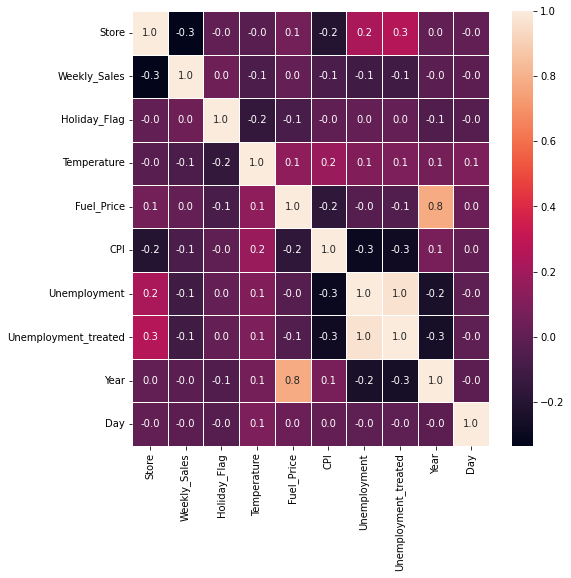

In [37]:
# Heatmap
plt.figure(figsize=(8,8))
sns.heatmap(walmart_data.corr(),annot=True,fmt='.1f',linewidths=.8)

In [91]:
# Linear Regression :

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, Y_train, Y_test = train_test_split(X_std,Y,test_size=0.2)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((5147, 5), (1287, 5), (5147,), (1287,))

Accuracy of test data: 13.476939335936533
Mean Absolute Error: 436048.8067362629
Mean Squared Error: 285419121094.3098
Root Mean Squared Error: 534246.3112594319


<AxesSubplot:ylabel='Weekly_Sales'>

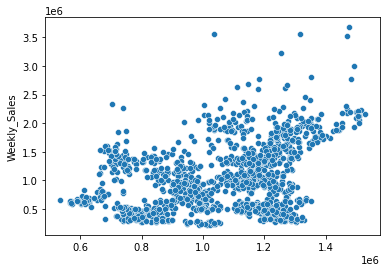

In [92]:
reg = LinearRegression()
reg.fit(X_train, Y_train)
Y_test_pred = reg.predict(X_test)
from sklearn import metrics
print('Accuracy of test data:',reg.score(X_test, Y_test)*100)
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_test_pred)))
sns.scatterplot(Y_test_pred, Y_test)

Accuracy of test data: 94.06832847178373
Mean Absolute Error: 74680.64108453768
Mean Squared Error: 19567181988.359875
Root Mean Squared Error: 139882.74371186702


<AxesSubplot:ylabel='Weekly_Sales'>

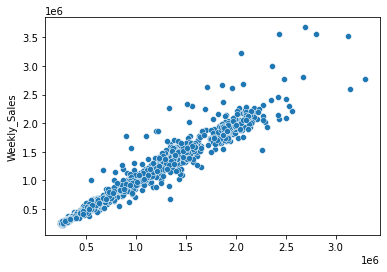

In [96]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
randomfrst = RandomForestRegressor()        
randomfrst.fit(X_train,Y_train)
Y_pred = randomfrst.predict(X_test)
print('Accuracy of test data:',randomfrst.score(X_test, Y_test)*100)
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
sns.scatterplot(Y_pred, Y_test)

Accuracy of Train data: 100.0
Accuracy of test data: 91.07624160355996
Mean Absolute Error:  85680.81022533022
Mean Square Error:  27831739269.170708
Root Mean Square Error:  166828.47259736783


ValueError: continuous is not supported

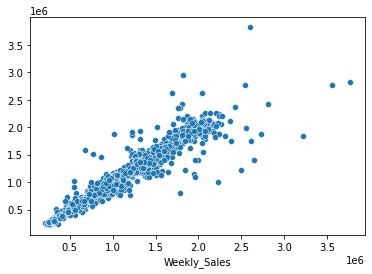

In [97]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
X_train, X_test, y_train, y_test = train_test_split(X_std,Y,test_size=0.2)
model = DecisionTreeRegressor()
model.fit(X_train,y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
print("Accuracy of Train data:", model.score(X_train,y_train)*100)
print('Accuracy of test data:',model.score(X_test, y_test)*100)
print("Mean Absolute Error: ",metrics.mean_absolute_error(y_test,y_pred_test))
print("Mean Square Error: ",metrics.mean_squared_error(y_pred_test,y_test))
print("Root Mean Square Error: ",np.sqrt(metrics.mean_squared_error(y_pred_test,y_test)))
sns.scatterplot(y_test,y_pred_test)

<AxesSubplot:>

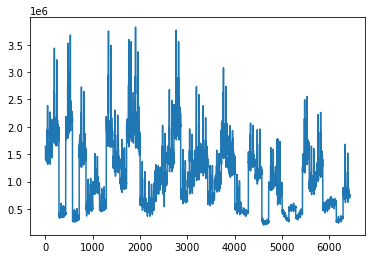

In [51]:
walmart_data['Weekly_Sales'].plot()
# This is seasonal data

In [54]:
from statsmodels.tsa.stattools import adfuller
sales_data = walmart_data['Weekly_Sales']
result = adfuller(sales_data)
p_value = result[1]
print("P_value: ",p_value)
if p_value < 0.05:
    print("The data is stationary.")
else:
    print("The data is not stationary.")    

P_value:  0.00011613258802178222
The data is stationary.
